<a href="https://colab.research.google.com/github/MrSmont/TdG-SantiagoMontoya/blob/main/Sesi%C3%B3n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import classification_report

In [ ]:

os.chdir("/content/drive/MyDrive")

df=pd.read_csv('datos_sesion2.csv',encoding='latin-1')
X = df.iloc[:, :9]
labels = df.iloc[:, 9]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Label'] = labels

# Create a pair plot
#plt.figure(figsize=(20, 20))
#sns.pairplot(df_scaled, hue='Label', palette='magma', plot_kws={'alpha': 0.5})
#plt.suptitle('Pairwise Relationships between EMG Signal Characteristics', y=1.02)
#plt.show()


<ipython-input-5-de6e2831688c>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


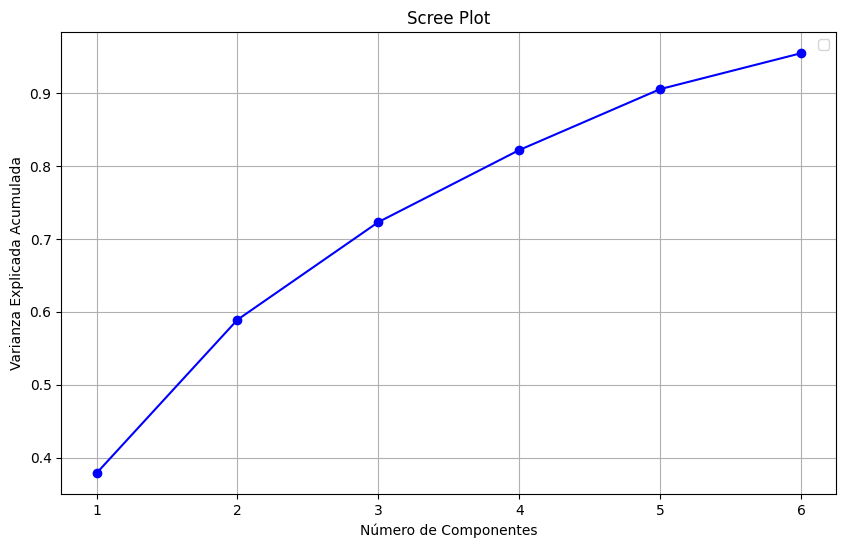


Importancia de características por componente:
                            PC1       PC2       PC3       PC4       PC5  \
RMS                    0.483204  0.020248  0.209479 -0.040036 -0.012254   
iEMG                   0.483645  0.004814  0.209961 -0.040742 -0.018669   
Exponente de Lyapunov -0.380097  0.110721 -0.146106 -0.012976 -0.104884   
Entropía aproximada   -0.001429 -0.358617  0.042536  0.284242  0.871709   
OBW                   -0.465417  0.144278 -0.170330  0.057015  0.119230   
Varianza               0.118960  0.642051 -0.039807  0.001728  0.216196   
Frecuencia Media      -0.200437  0.061752  0.732843  0.004587 -0.025637   
MAD                    0.107411  0.630690 -0.066124  0.016506  0.299385   
Cruce Cero            -0.317079  0.129924  0.562877  0.025995  0.036205   
Etiquetas              0.071478  0.084809 -0.004365  0.954753 -0.275805   

                            PC6  
RMS                    0.282609  
iEMG                   0.279445  
Exponente de Lyapunov  0

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicar PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
var_explicada = pca.explained_variance_ratio_
var_acumulada = np.cumsum(var_explicada)

# Gráfico de varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), var_acumulada, 'bo-')
#plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Scree Plot')
plt.grid(True)
plt.legend()
plt.show()

# DataFrame con resultados PCA
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_df['Label'] = df.iloc[:, -1]

# Guardar el DataFrame en un archivo CSV
pca_df.to_csv('emg_pca_sesion2.csv', index=False)


# Importancia de características
importancia = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
    index=df.columns
)
print("\nImportancia de características por componente:")
print(importancia)

# Porcentaje de varianza explicada por cada componente
print("\nVarianza explicada por componente:")
for i, var in enumerate(var_explicada, 1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       360
           1       0.96      0.96      0.96       417
           2       0.95      0.96      0.95       397
           3       0.93      0.96      0.94       387
           4       0.95      0.92      0.94       411
           5       0.92      0.95      0.93       388
           6       0.95      0.92      0.94       399
           7       0.93      0.91      0.92       433
           8       0.89      0.95      0.92       403
           9       0.93      0.92      0.93       381
          10       0.96      0.93      0.95       395
          11       0.95      0.96      0.96       393
          12       0.94      0.95      0.94       391
          13       0.94      0.95      0.95       380
          14       0.97      0.94      0.95       391
          15       0.98      0.99      0.98       372

    accuracy                           0.

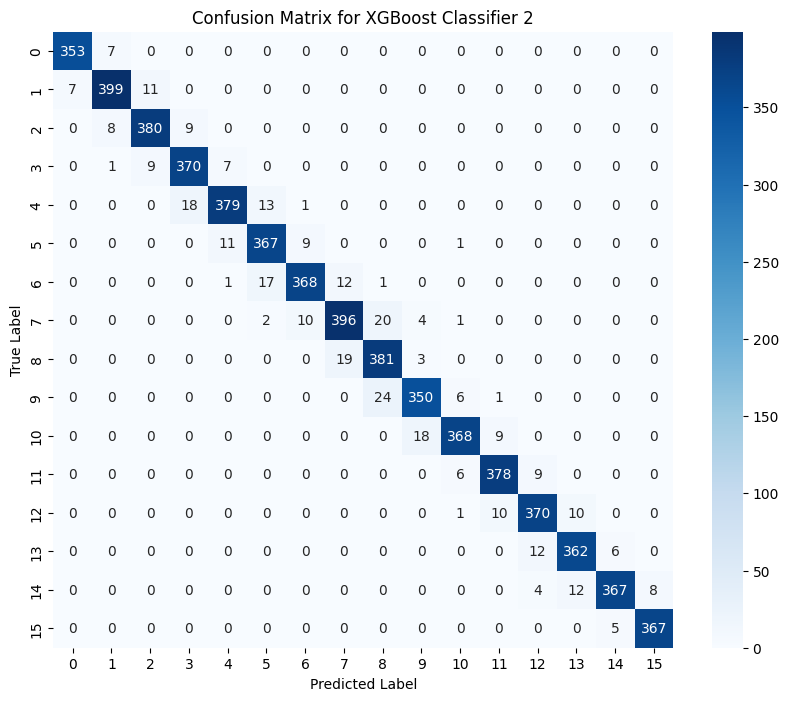

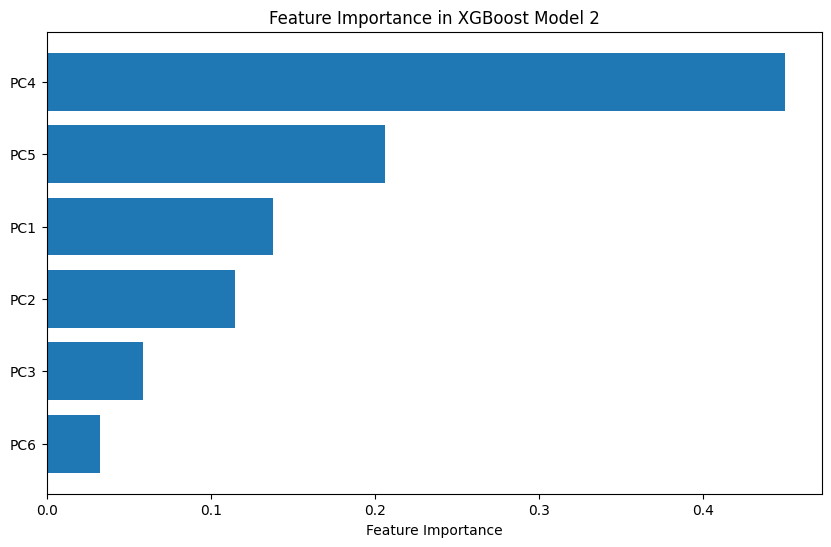

In [ ]:

data = pd.read_csv('emg_pca_sesion2.csv')


X = data.iloc[:, :6]
y = data.iloc[:,6]
y=y-1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizations

# 1. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier 2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = xgb_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XGBoost Model 2')
plt.show()


Accuracy: 0.92
              precision    recall  f1-score   support

           1       0.93      0.96      0.95       360
           2       0.94      0.91      0.93       417
           3       0.96      0.97      0.96       397
           4       0.95      0.95      0.95       387
           5       0.92      0.92      0.92       411
           6       0.91      0.93      0.92       388
           7       0.93      0.90      0.92       399
           8       0.92      0.90      0.91       433
           9       0.85      0.93      0.89       403
          10       0.90      0.84      0.87       381
          11       0.87      0.92      0.89       395
          12       0.93      0.91      0.92       393
          13       0.92      0.94      0.93       391
          14       0.92      0.92      0.92       380
          15       0.92      0.90      0.91       391
          16       0.94      0.94      0.94       372

    accuracy                           0.92      6298
   macro av

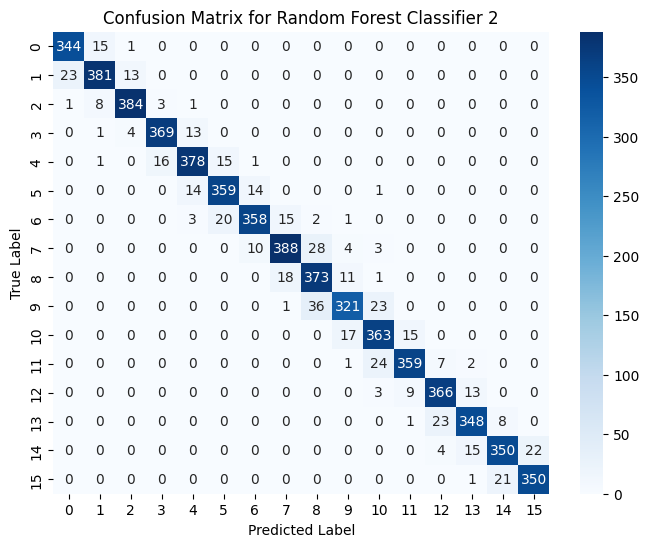

In [ ]:


data = pd.read_csv('emg_pca_sesion2.csv')
X = data[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
y = data['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest Classifier 2")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       360
           1       0.98      0.96      0.97       417
           2       0.95      0.97      0.96       397
           3       0.98      0.97      0.97       387
           4       0.98      0.99      0.98       411
           5       0.99      0.97      0.98       388
           6       0.97      0.97      0.97       399
           7       0.97      0.96      0.96       433
           8       0.93      0.97      0.95       403
           9       0.99      0.98      0.98       381
          10       0.98      0.99      0.99       395
          11       0.98      0.98      0.98       398
          12       0.97      0.98      0.98       376
          13       0.98      0.97      0.98       386
          14       0.98      0.97      0.98       389
          15       0.98      0.99      0.99       378

    accuracy                           0.98      6298
   macro av

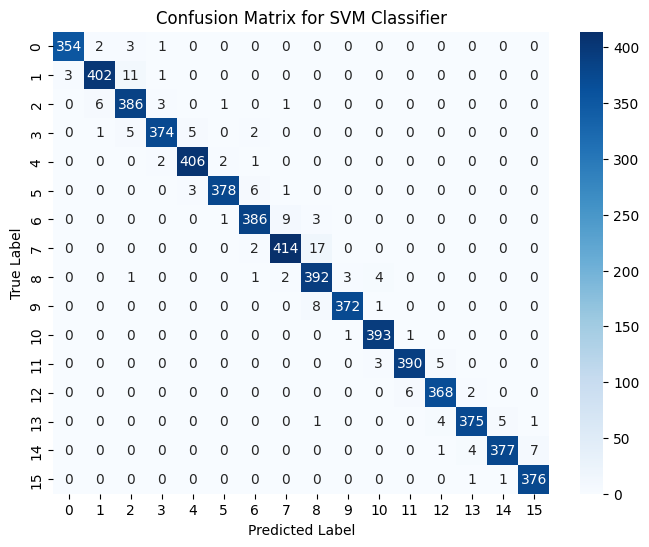

In [ ]:

data = pd.read_csv('emg_pca_sesion2.csv')
X = data.iloc[:, :6]
y = data.iloc[:,6]
y=y-1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1965 - loss: 2.3916 - val_accuracy: 0.5389 - val_loss: 1.4901
Epoch 2/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6113 - loss: 1.3318 - val_accuracy: 0.7901 - val_loss: 1.0279
Epoch 3/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8295 - loss: 0.9521 - val_accuracy: 0.9303 - val_loss: 0.7892
Epoch 4/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9324 - loss: 0.7396 - val_accuracy: 0.9802 - val_loss: 0.6194
Epoch 5/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9797 - loss: 0.5814 - val_accuracy: 0.9924 - val_loss: 0.4831
Epoch 6/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9946 - loss: 0.4524 - val_accuracy: 0.9973 - val_loss: 0.3717
Epoch 7/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9982 - loss: 0.3471 - val_accuracy: 0.9992 - val_loss: 0.2801
Epoch 8/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9997 - loss: 0.2612 - val_accuracy: 0.

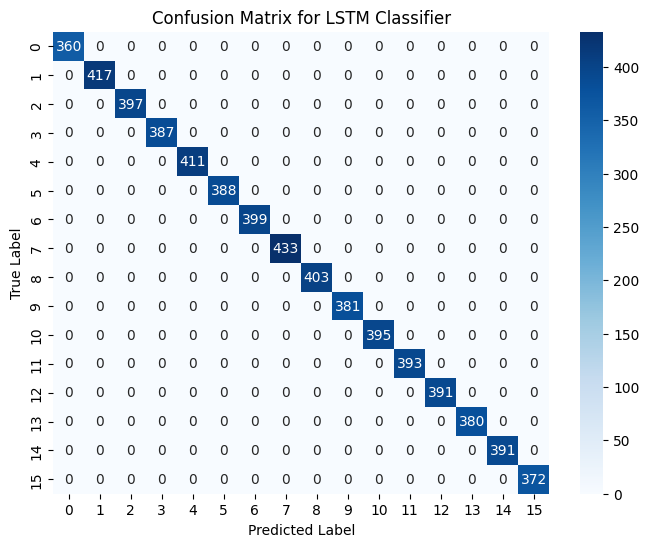


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       417
           2       1.00      1.00      1.00       397
           3       1.00      1.00      1.00       387
           4       1.00      1.00      1.00       411
           5       1.00      1.00      1.00       388
           6       1.00      1.00      1.00       399
           7       1.00      1.00      1.00       433
           8       1.00      1.00      1.00       403
           9       1.00      1.00      1.00       381
          10       1.00      1.00      1.00       395
          11       1.00      1.00      1.00       393
          12       1.00      1.00      1.00       391
          13       1.00      1.00      1.00       380
          14       1.00      1.00      1.00       391
          15       1.00      1.00      1.00       372

    accuracy                           1.00      6298
  

In [ ]:

# 1. Load and Preprocess Data
data = pd.read_csv('emg_pca_sesion2.csv')
X = data[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
y = data['Label']

# a. Encode Labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# b. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# c. Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# d. Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# 2. Build LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]))) # Input LSTM layer
model.add(Dense(y.shape[1], activation='softmax')) # Output layer

# 3. Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Train Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 5. Evaluate Model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for LSTM Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.2283 - loss: 2.2468 - val_accuracy: 0.4403 - val_loss: 1.4259
Epoch 2/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5133 - loss: 1.3146 - val_accuracy: 0.6084 - val_loss: 1.0566
Epoch 3/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6657 - loss: 0.9763 - val_accuracy: 0.7239 - val_loss: 0.8330
Epoch 4/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7734 - loss: 0.7743 - val_accuracy: 0.8379 - val_loss: 0.6519
Epoch 5/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8361 - loss: 0.6201 - val_accuracy: 0.8717 - val_loss: 0.5294
Epoch 6/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8726 - loss: 0.5105 - val_accuracy: 0.8693 - val_loss: 0.4521
Epoch 7/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9002 - loss: 0.4192 - val_accuracy: 0.9116 - val_loss: 0.3751
Epoch 8/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9114 - loss: 0.3514 - val_accuracy:

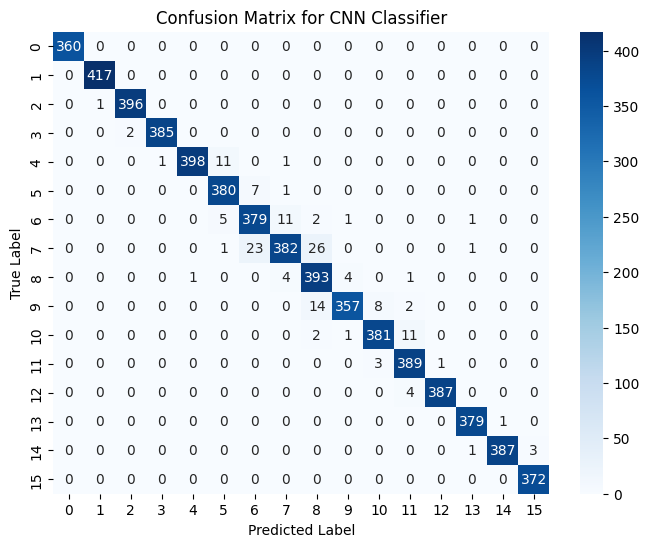


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       417
           2       0.99      1.00      1.00       397
           3       1.00      0.99      1.00       387
           4       1.00      0.97      0.98       411
           5       0.96      0.98      0.97       388
           6       0.93      0.95      0.94       399
           7       0.96      0.88      0.92       433
           8       0.90      0.98      0.94       403
           9       0.98      0.94      0.96       381
          10       0.97      0.96      0.97       395
          11       0.96      0.99      0.97       393
          12       1.00      0.99      0.99       391
          13       0.99      1.00      0.99       380
          14       1.00      0.99      0.99       391
          15       0.99      1.00      1.00       372

    accuracy                           0.98      6298
  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# 1. Load and Preprocess Data
data = pd.read_csv('emg_pca_sesion2.csv')
X = data[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
y = data['Label']

# a. Encode Labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# b. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# c. Reshape for CNN [samples, timesteps, features]
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# 3. Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Train Model (20 epochs)
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 5. Evaluate Model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true_classes = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for CNN Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

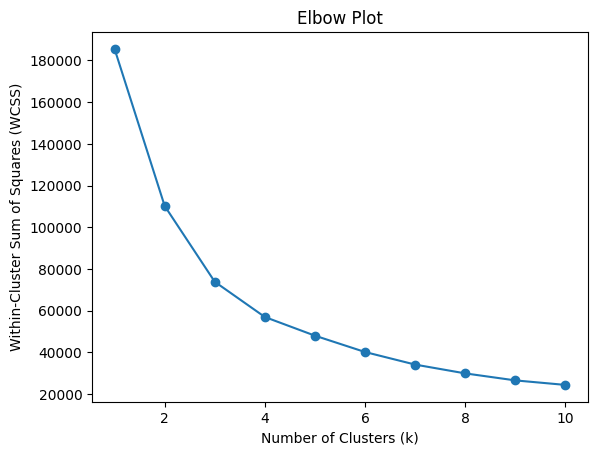

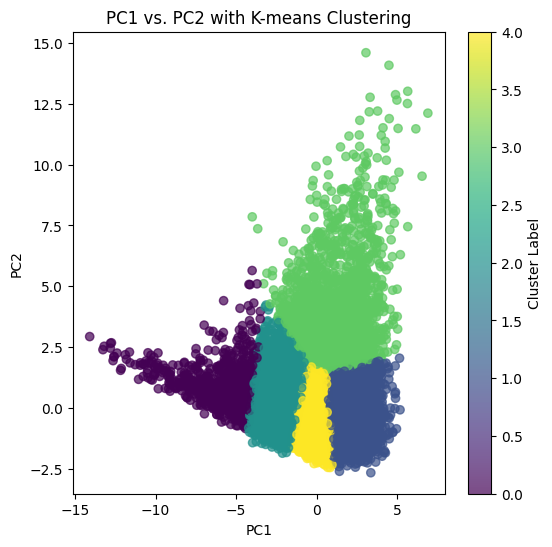

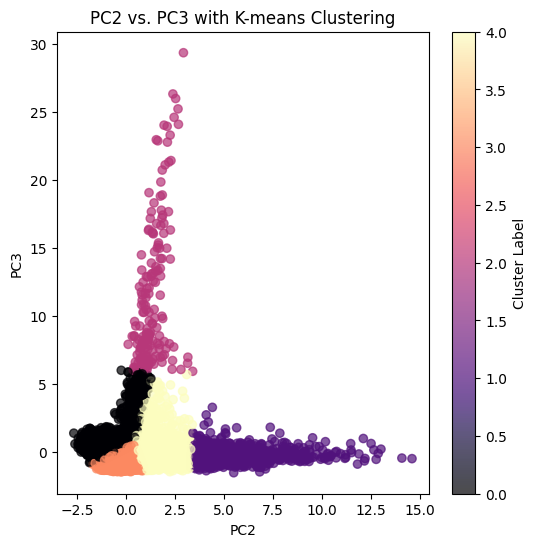

In [ ]:

df = pd.read_csv('emg_pca_sesion2.csv',encoding='latin-1')


#Elbow plot

k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['PC1', 'PC2']])
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Plot')
plt.show()


# PC1 VS PC2
kmeans1 = KMeans(n_clusters=5, random_state=42)
kmeans1.fit(df[['PC1','PC2']])
kmeans1.labels_

#PC2 VS PC3
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit(df[['PC2','PC3']])
kmeans2.labels_



plt.figure(figsize=(6, 6))
plt.scatter(df['PC1'], df['PC2'], c=kmeans1.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs. PC2 with K-means Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(df['PC2'], df['PC3'], c=kmeans2.labels_, cmap='magma', alpha=0.7)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs. PC3 with K-means Clustering')
plt.colorbar(label='Cluster Label')
plt.show()
